1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [How many Cars Sold per year?](#section401)<br/>
    - 4.2 [Which company has highest market share by volume ( no: of cars sold )?](#section402)<br/>
    - 4.3 [Which company has highest market share by Revenue Earned?](#section403)<br/>
    - 4.4 [Which BodyType has highest market share by number?](#section404)<br/>
    - 4.5 [What is distribution of Bodytype of Top 5 companies by volume?](#section405)<br/>
    - 4.6 [What is distribution of Bodytype of Top 5 companies by Revenue?](#section406)<br/>
    - 4.7 [What is the trend Analysis for Body Types by count?](#section407)<br/>
    - 4.8 [What is the trend Analysis for Body Types by revenue?](#section408)<br/>
     

5. [Analysis ( by body, engine Volume, engine type )](#section5)<br/>  
    - 5.1 [Mean Price BodyType](#section401)<br/>
    - 5.2 [By Engine Volume](#section402)<br/>
    - 5.3 [By Mileage](#section403)<br/>
    - 5.4 [By EngineType](#section404)<br/>
    - 5.5 [By Body and EngineType](#section405)<br/>
    - 5.6 [Percentage distribution of Brand and Body( by Count / Revenue)](#section406)<br/>
    - 5.7 [By adding DriveType](#section407)<br/>
   

5. [Conclusion ](#section5)<br/>  
    


# 1. Problem Statement ![title](Car_sales.PNG)

The notebooks explores the sales pattern of car sales from 1953-2016 using Exploratory Data Analysis(EDA).

* Analysis can be use for
It cane used for  for below reasons :
    - Finding sales patterns in sales
    - Determining relationships in sales
   

# 2. Data Loading and Description


- The dataset consists of the information about car sales from 1953-2016. Various variables present in the dataset includes data of car, price, body, mileage, year etc. 
- The dataset comprises of __9576 observations of 10 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| car   | Car Company                                         | 
| price      | Price of the car                         |  
| body          | BodyType of the car                                         |   
| mileage        | Mileage of the car                                           | 
| engV           | Engine size by Voulme of the car                                          |
| engType           | Engine Type of the car ( Petrol, Diesel etc.. )                                           |
| registration         | Whether car is registered |
| year         | Registration year of the car |
| model        | Model Name of the car                                             |
| drive          | Drive Type ( Front-Wheel, Full-Wheel,  etc,,)                                           |





#### Importing packages      

In [ ]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
# import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from subprocess import check_output

import warnings                                                   # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

from pandas.plotting import parallel_coordinates
!pip install pandas-profiling
import pandas_profiling
import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

#### Importing the Dataset

In [7]:
path = "D:\\NI\\INS\\Term-1-master\\Term-1-master\\Data\\Projects\\"
filename = "car_sales_orig.csv"
cars = pd.read_csv(path+filename,encoding='latin-1') 
# cars = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv",,encoding='latin-1') 

## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various columns.
- Then with the help of  profiling we will find which columns of our dataset need preprocessing.
- In preprocessing we will deal with erronous and missing values of columns. 
- Again we will do  profiling to see how preprocessing have transformed our dataset.

### 3.1 Understanding the Dataset

In [10]:
cars.shape

(9576, 10)

In [12]:
cars.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [13]:
cars.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [14]:
cars.tail()

,car,price,body,mileage,engV,engType,registration,year,model,drive
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


In [15]:
cars.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [17]:
cars.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


- Summary of data types in this dataset:
 - <em>Numeric</em>: <strong>Age,Mileage, Price, Year</strong> (integer)
 - <em>Object</em>: Everything else
- <strong>Year</strong> has 63 distinct years. Group the responses into fewer categories. 
- <strong>Price, Mileage</strong> has some values that are 0 or too high to be real.
- The following variables have null values that may need to addressed.
 - <strong>Drive</strong>:  There are 511 rows where Drive Type is missing



In [20]:
cars.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

From the above output we can see that __engV__ and __drive__ columns contains __maximum 0 and null values__. We will see how to deal with them.

### 3.2 Pre Profiling

In [24]:
profile = pandas_profiling.ProfileReport(cars)
profile.to_file(outputfile="cars_f_preprocessing.html")

- Sedan, Crossovers and Vans have highest sales and revenue

### 3.3 Preprocessing

- Deal Separately with missing values and 0s for Sedan, Crossovers and Vans<br/>
    - Replacing missing entries of _drive__ with mode.
    - Replacing 0 values of __mileage__ with median values.
    - Replacing 0 values of __price__ with median values.
    - Replacing Missing/0 values of __engV__ with median values.<br/><br/>
    
- Group hatch, Others and Vagons - Do same with missing values and 0s as above <br/>  
<br/> 

- Outlier Treatment<br/>
    - Replacing outliers of __mileage__ ,__price__,__engV__ with median values .<br/> 
    - Replace Sedan, Crossovers and Vans as per group
    - Group and Replace hatch, Others and Vagons together<br/> 
  
    
- Add a decade Column and classify sales as decade 
               ( e.g :- 1950-59 as 1950s, 1960-69 as 1960s, .. 2000-1009 as 2000s, 2010-106 as 2010s)
   

In [26]:
dfs = cars[cars['body']=='sedan']
dfc = cars[cars['body']=='crossover']
dfv = cars[cars['body']=='van']

# pre-processing for sedan 
sengv = dfs.engV.median()
smileage = dfs.mileage.median()
dfs.engV.fillna(dfs.engV.median(), inplace = True)
dfs['engV']=dfs['engV'].replace(0,dfs['engV'].median())
dfs.drive.fillna(dfs['drive'].mode()[0],inplace = True)
dfs['price']=dfs['price'].replace(0,dfs['price'].median())
dfs['mileage']=dfs['mileage'].replace(0,dfs['mileage'].median())
dfs.loc[dfs['engV'] > 3.6, 'engV'] = sengv
dfs.loc[dfs['engV'] < 0.4, 'engV'] = sengv
dfs.loc[dfs['mileage'] > 182, 'mileage'] = smileage

# pre-processing for Crossover 
cengv = dfc.engV.median()
cmileage = dfc.mileage.median()
dfc.engV.fillna(dfc.engV.median(), inplace = True)
dfc['engV']=dfc['engV'].replace(0,dfc['engV'].median())
dfc.drive.fillna(dfc['drive'].mode()[0],inplace = True)
dfc['price']=dfc['price'].replace(0,dfc['price'].median())
dfc['mileage']=dfc['mileage'].replace(0,dfc['mileage'].median())
dfc.loc[dfc['engV'] > 5.75, 'engV'] = cengv
dfc.loc[dfc['mileage'] > 265, 'mileage'] = cmileage

# pre-processing for van
vengv = dfv.engV.median()
vmileage = dfv.mileage.median()
dfv.engV.fillna(dfv.engV.median(), inplace = True)
dfv['engV']=dfv['engV'].replace(0,dfv['engV'].median())
dfv.drive.fillna(dfv['drive'].mode()[0],inplace = True)
dfv['price']=dfv['price'].replace(0,dfv['price'].median())
dfv['mileage']=dfv['mileage'].replace(0,dfv['mileage'].median())
dfv.loc[dfv['engV'] > 3.1, 'engV'] = vengv
dfv.loc[dfv['engV'] < 0.7, 'engV'] = vengv
dfv.loc[dfv['mileage'] > 394.5, 'mileage'] = vmileage

In [27]:
# pre-processing for rest bodyTypes
dfo = cars[cars['body'].isin(['hatch','other','vagon'])]
oengv = dfo.engV.median()
omileage = dfo.mileage.median()
dfo.engV.fillna(dfo.engV.median(), inplace = True)
dfo['engV']=dfo['engV'].replace(0,dfo['engV'].median())
dfo.drive.fillna(dfo['drive'].mode()[0],inplace = True)
dfo['price']=dfo['price'].replace(0,dfo['price'].median())
dfo['mileage']=dfo['mileage'].replace(0,dfo['mileage'].median())

In [28]:
carnew = pd.concat([dfc, dfs, dfv,dfo]) #Concat to get new total df
carnew['decade'] = carnew['year'].astype(int)
carnew['decade'] = carnew['decade'].map( lambda x: (x- x%10 ) )  #Add Decade column


## 3.4 Post Pandas Profiling

In [35]:
profile = pandas_profiling.ProfileReport(carnew)
profile.to_file(outputfile="cars_f_after_preprocessing.html")


In [42]:
cars = carnew.copy()

In [52]:
# for simplicity while calculating sum
cars['price_in_Ks'] = cars['price']/1000
cars['price_in_Mn'] = cars['price']/1000000

# 4. Questions

### 4.1 How many Cars Sold per year ?

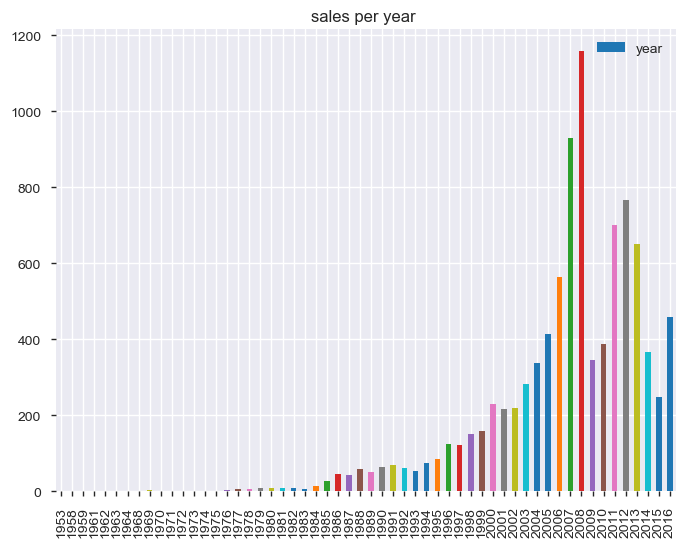

In [39]:
cars['year'].value_counts()
cars['year'].value_counts().sort_index().plot(kind='bar',legend ='True',figsize = (8, 6), title = 'sales per year ' )

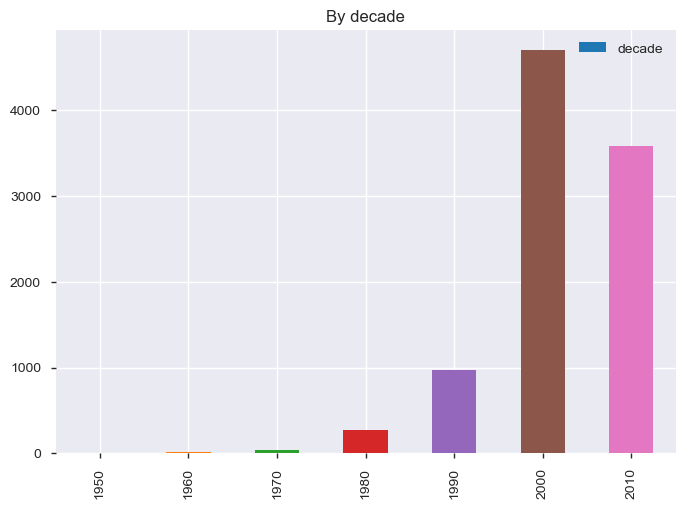

In [43]:
# Cars sold each decade
cars['decade'].value_counts()
cars['decade'].value_counts().sort_index().plot(kind='bar',legend ='True', title = 'By decade' )

- 2000-2009 and 2010-2016 have sold most cars

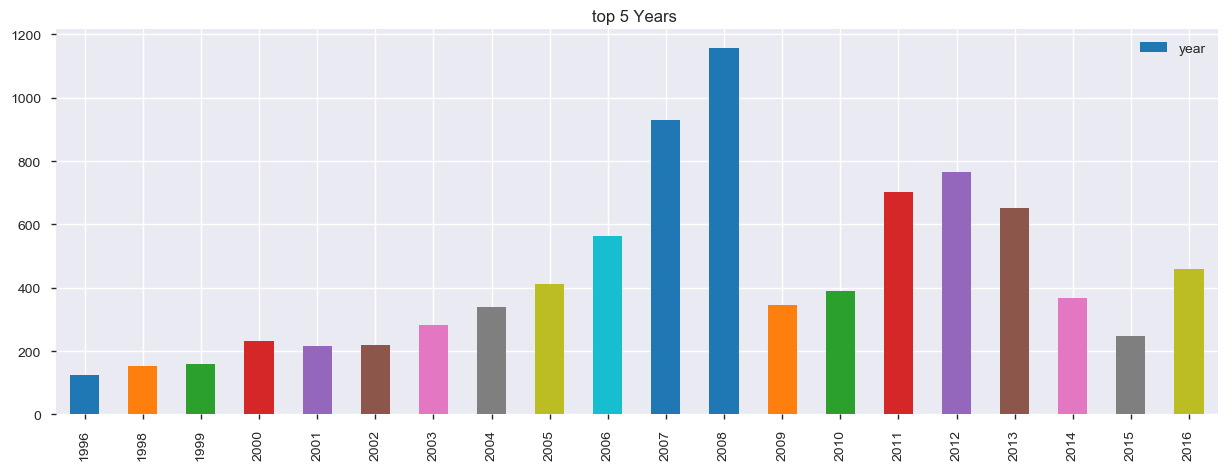

In [40]:
 # Top 20 years
cars['year'].value_counts().head(5)
cars['year'].value_counts().head(20).sort_index().plot(kind='bar',figsize = (15, 5),legend ='True', title = 'top 5 Years ' )

- Most cars were sold in 2007,2008,2011,2012,2013

### 4.2       Which company has highest market share by volume ( no: of cars sold )?

Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
VAZ              489
Renault          469
Audi             457
Opel             400
Skoda            368
Nissan           368
Name: car, dtype: int64

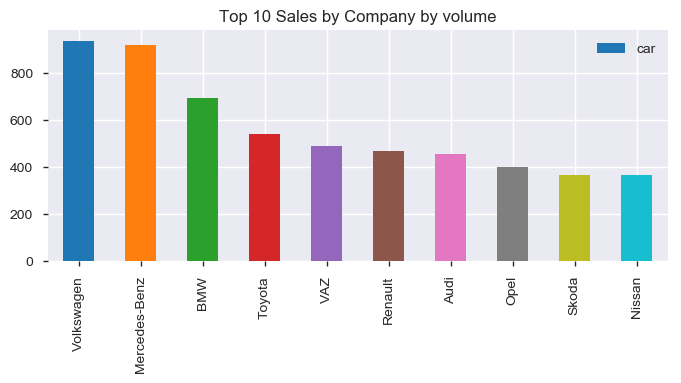

In [171]:
b= cars['car'].value_counts().head(10)
b.plot(kind='bar',legend ='True',figsize = (8, 3),  title = 'Top 10 Sales by Company by volume' )
b

### 4.3       Which company has highest market share by Revenue Earned?

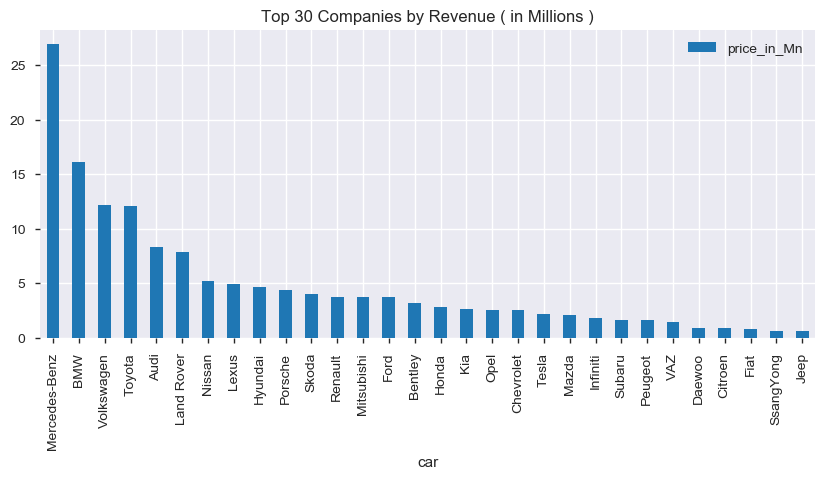

In [59]:
rc = cars.groupby(['car']).agg({'price_in_Mn':'sum'}).nlargest(30,'price_in_Mn')
rc.nlargest(30,'price_in_Mn')
rc.plot(kind='bar',legend ='True',figsize = (10, 4) ,title = 'Top 30 Companies by Revenue ( in Millions )' )
# rc

- Top 5 by Volume
    - Volkswagen       936
    - Mercedes-Benz    921
    - BMW              694
    - Toyota           541
    - VAZ              489
    
- Top 5 by Revenue
    - Mercedes-Benz 	26.920245
    - BMW 	16.119071
    - Volkswagen 	12.150330
    - Toyota 	12.094808
    - Audi 	8.335818
    
- It can be seen top 4 slots by revenue are Merc,BMW, Volkswagen and Toyota.<br/>
- It can be seen top 4 slots by voume are Volkswagen, Merc,BMW   and Toyota.<br/>
- VAZ is 5th in volume but 25th by revenue.
- VAZ 'may' be seen as a budget car

### 4.4       Which BodyType has highest market share by number?

sedan        3646
crossover    2069
hatch        1252
van          1049
other         838
vagon         722
Name: body, dtype: int64

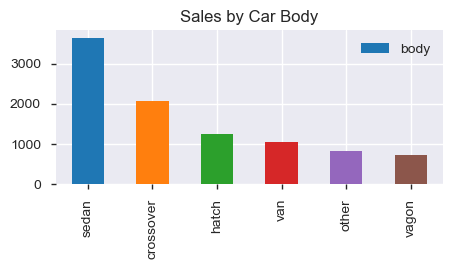

In [63]:
bo= cars['body'].value_counts()
bo.plot(kind='bar',legend ='True', title = 'Sales by Car Body',figsize = (5, 2) )
bo

- Sedan has the highest,followed by Crossover and Hatchback

## 4.5  What is distribution of Bodytype of Top 5 companies by volume

Text(0.5,1,'Mercedes-Benz')

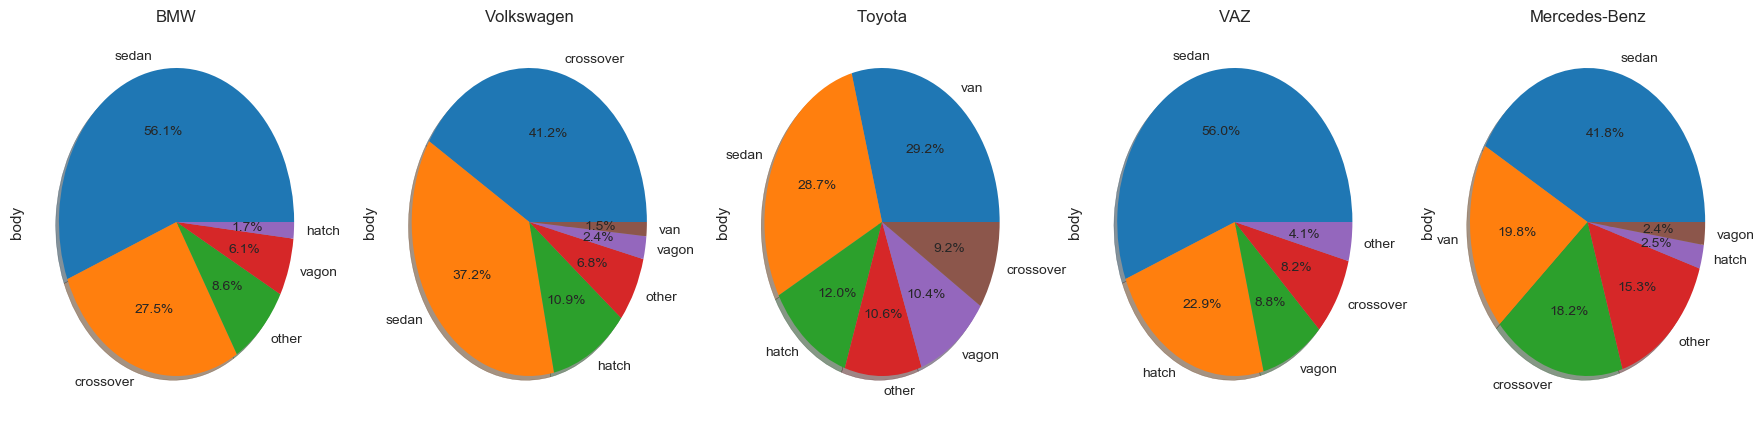

In [68]:
cart5v = cars[cars['car'].isin(['Mercedes-Benz','Volkswagen','BMW', 'VAZ', 'Toyota'])]
z= cart5v.groupby(['car','body'])['price_in_Ks'].agg(['sum','mean','count'])
f,ax = plt.subplots(1,5,figsize=(22,5))
cart5v['body'][cart5v['car'] == 'BMW'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
cart5v['body'][cart5v['car'] == 'Volkswagen'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2],shadow=True)
cart5v['body'][cart5v['car'] == 'Toyota'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
cart5v['body'][cart5v['car'] == 'VAZ'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3],shadow=True)
cart5v['body'][cart5v['car'] == 'Mercedes-Benz'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[4],shadow=True)
ax[0].set_title('BMW')
ax[1].set_title('Volkswagen')
ax[2].set_title('Toyota')
ax[3].set_title('VAZ')
ax[4].set_title('Mercedes-Benz')

- Sedan sells the most for Mercedes-Benz,BMW, Audi.
- Sedan occupies a close 2nd spot for Volkswagen,Toyota

## 4.6  What is distribution of Bodytype of Top 5 companies by Revenue

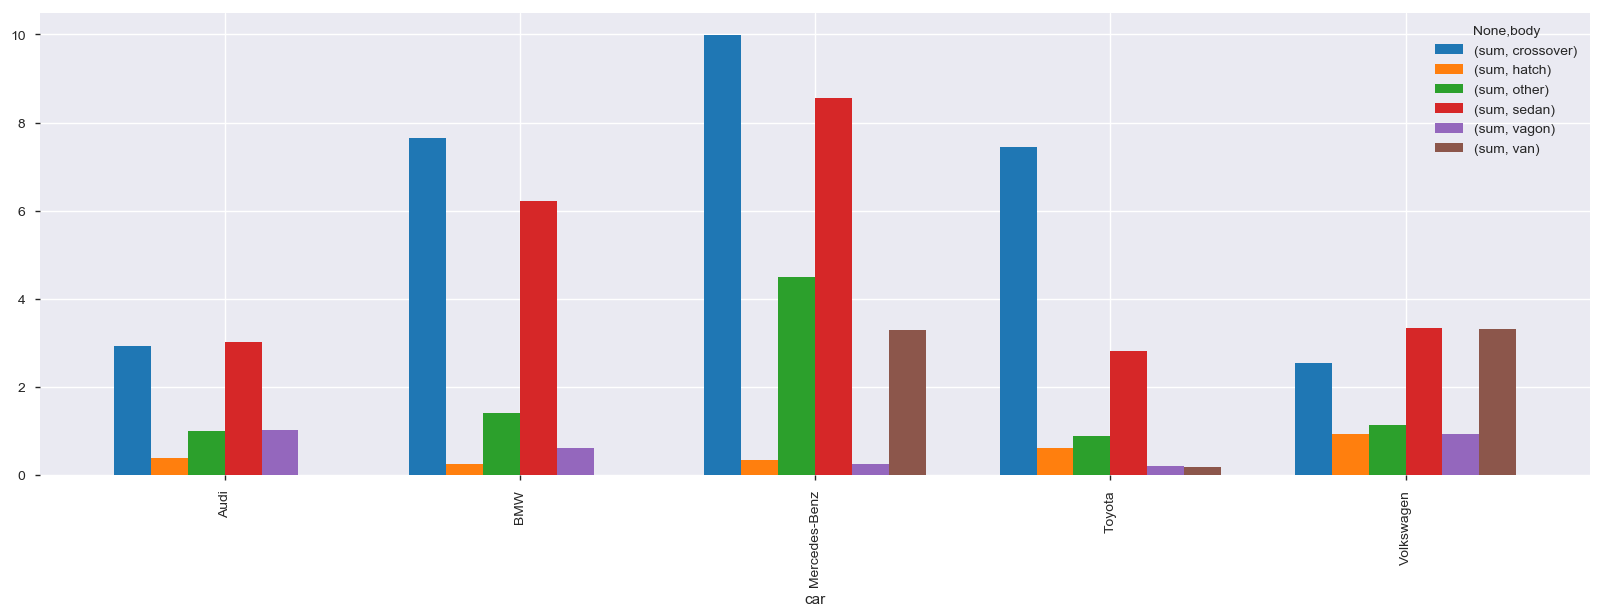

In [84]:
cart5v2 = cars[cars['car'].isin(['Mercedes-Benz','Volkswagen','BMW', 'Audi', 'Toyota'])]
z3= cart5v2.groupby(['car','body'])['price_in_Mn'].agg(['sum'])
z3.unstack().plot(kind='bar', stacked=False, width=.75, figsize=(20,6))

- Crossover earns the most for Mercedes-Benz,BMW, Audi and Toyota.
- Vans and Sedan Earn most for Volkswagen

## 4.7 What is the trend Analysis for Body Types by count?

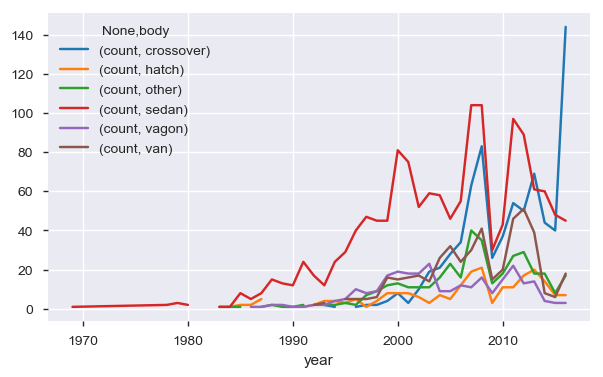

In [87]:
year_trend = cart5v2.groupby(['year','body'])['body'].agg(['count'])
year_trend.unstack().plot.line(stacked=False,figsize=(7,4))

- Sales of all types had an upward trend till 2008, dropped for a year and again increased
- Sedan trends follow similar pattern but a sharp decline 2011 onwards
- Crossover Sales increased after 2001 sharply, had a drop in 2008, but an exponential rise is seen 2013 onwards
- Van Sales have a same pattern like Crossover but on a lower scale as they are sold mostly by Volkswagen, Toyota while other 3 are almost non-existent

## 4.8 What is the trend Analysis for Body Types by revenue?

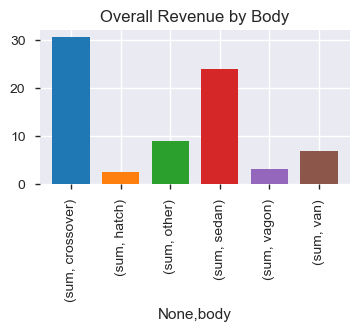

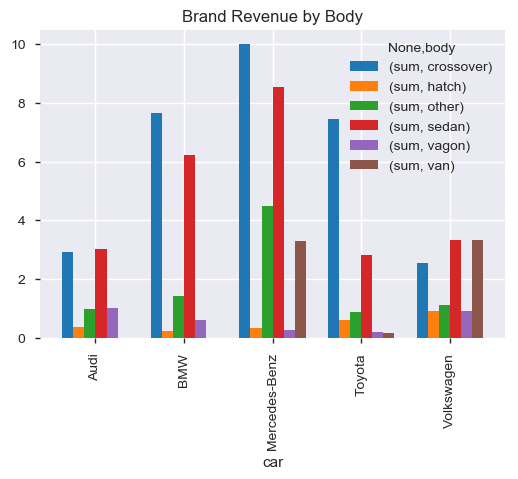

In [88]:
z2= cart5v2.groupby(['body'])['price_in_Mn'].agg(['sum'])
z2.plot
z2.unstack().plot(kind='bar', stacked=False, width=.75, figsize=(4,2),title ='Overall Revenue by Body')
z21= cart5v2.groupby(['car','body'])['price_in_Mn'].agg(['sum'])
z21.plot
z21.unstack().plot(kind='bar', stacked=False,width=.75, figsize=(6,4),title ='Brand Revenue by Body')

- It can be seen top 4 slots by revenue are Merc,BMW, Volkswagen and Toyota.
- Revenue earned by Crossover sales are highest for Top 3 companies
- Merc,BMW and Toyota dominate the revenue space for Crossovers
- Merc,BMW dominate the revenue space for Sedans
- Merc, Volkswagen are dominant for Vans
- The revenue earned by Crossovers is the highest although count is less than sedan 

# 5. Analysis ( by body, engine Volume, engine type )

- lets focus on crossover, sedan, van

###  5.1 Mean Price BodyType

,price_in_Ks,body
price_in_Ks,1.000000,-0.472635
body,-0.472635,1.000000


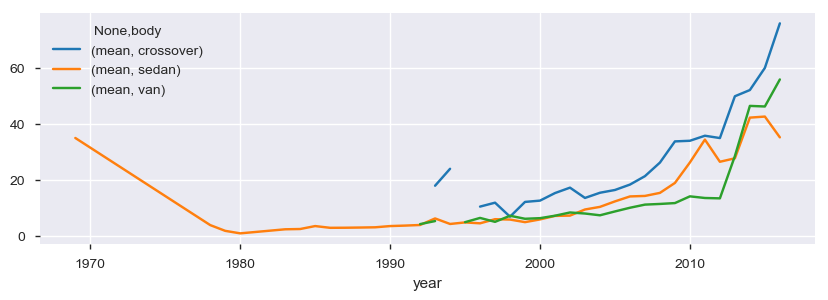

In [115]:
year_trend = cart5v2[cart5v2['body'].isin(['crossover', 'sedan', 'van'])].groupby(['year','body'])['price_in_Ks'].agg(['mean'])
year_trend.unstack().plot.line(stacked=False,figsize=(10,3))
t = cart5v2[cart5v2['year']>=2010]
t = cart5v2[cart5v2['body'].isin(['crossover', 'sedan', 'van'])]
df = pd.DataFrame({'price_in_Ks': t['price'], 'body': t['body']}, dtype='category')         # Create a new dataframe with the two columns and assign numbers in place of their categories
df_num = df.apply(lambda x: x.cat.codes)
df_num
df_num.corr()

- The Average price of Crossovers and Vans have increased steadily
- Average Price of Sedans decreased after 2013. Even then sales decreased
- Lower Pricing for sedans failed to increase sales after 2013

- body-codes
    - crossover	0
    - sedan	1
    - van	2
    
- As seen from corelation the price decreases for bodytpe still sales revenue is higher for crossovers


###  5.2 By Engine Volume

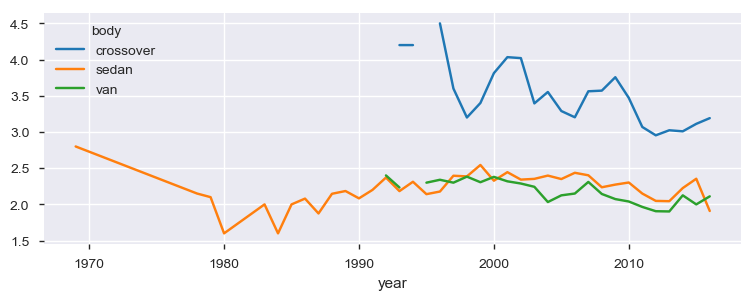

In [126]:
t = cart5v2[cart5v2['year']>=2010]
ztype = cart5v2[cart5v2['body'].isin(['crossover', 'sedan', 'van'])].groupby(['year','body'])['engV'].mean()
ztype.unstack().plot.line(stacked=False,figsize=(9,3))


- For the top 3 BodyTypes, the average engine Volume of Crossovers have increased steadily post 2011
- The average Engine-Volume of Vans/Crossovers has increased post 2011 but reduced sharply for sedans post 2013

###  5.3 By Mileage

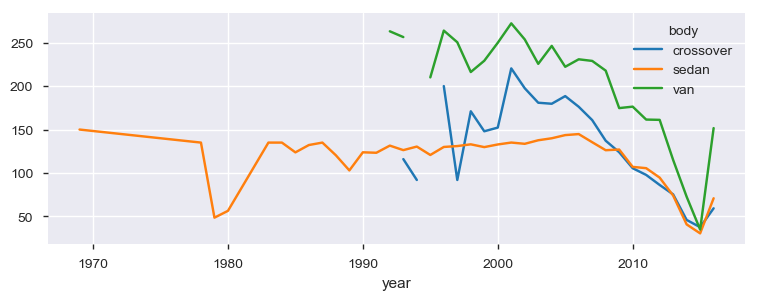

In [122]:
zmage = cart5v2[cart5v2['body'].isin(['crossover', 'sedan', 'van'])].groupby(['year','body'])['mileage'].mean()
zmage.unstack().plot.line(stacked=False,figsize=(9,3))

- Mileage for Crossover/sedans haave sharply decreased since 2001 to 2015 and then an small upward surge in last year
- Mileage for Vans have been same since 1985 to 2008, then a sharp decline and huge upward spike in last year
- Mileage is not a consideration for More Crossover sales

### 5.4 By EngineType

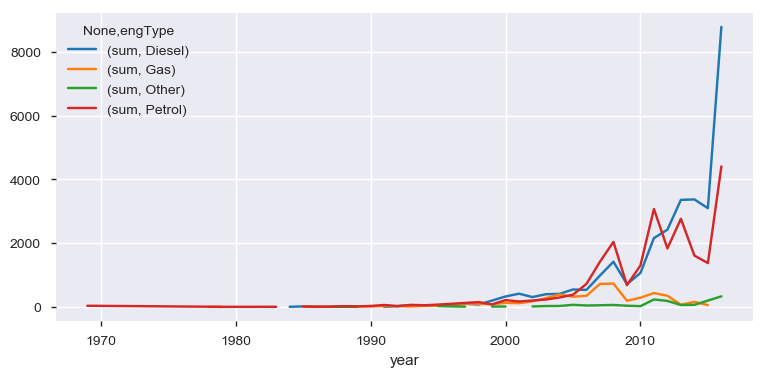

In [141]:
eng_trend = cart5v2[cart5v2['body'].isin(['crossover', 'sedan', 'van'])].groupby(['year','engType'])['price_in_Ks'].agg(['sum'])
eng_trend.unstack().plot.line(stacked=False,figsize=(9,4))

- Diesel cars have overtaken petrol somewher around 2011-2012
- Gas has least sales

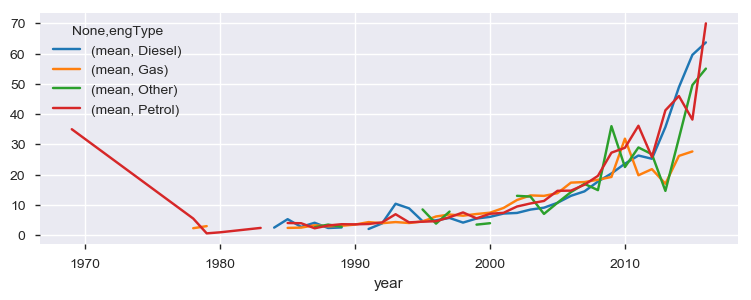

In [134]:
eng_mean = cart5v2[cart5v2['body'].isin(['crossover', 'sedan', 'van'])].groupby(['year','engType'])['price_in_Ks'].agg(['mean'])
eng_mean.unstack().plot.line(stacked=False,figsize=(9,3))


-Mean Price by Bodytpe
    - Mean price of Petrol Cars is more than other engine types
    - Gas has least

### 5.5 By Body and EngineType

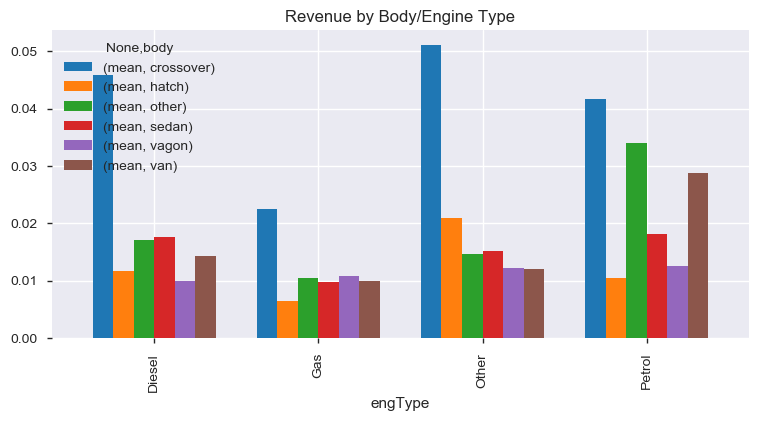

In [173]:
# BodyType and EngineType Analysis
dfm = cart5v2[(cart5v2['year'] > 1951) & (cart5v2['year'] <= 2016) ]
eb= cart5v2.groupby(['engType','body'])['price_in_Mn'].agg(['mean'])
eb.plot
eb.unstack().plot(kind='bar', stacked=False, width=.75, figsize=(9,4),title ='Revenue by Body/Engine Type')

- Revenue of (Others CrossOvers) is highest followed by Diesel Crossovers
- Revenue of (Petrol Sedans) is 2nd followed (Diesel Sedans)

- From 5.2 and 5.4, mean price of crossovers is similar to sedans but the Crossovers have higher Engine Volume.
- More prefrence to power as mileage is not a consideration as per 5.3
- To confirm, Analyse by Brand and Body and driveType

### 5.6 Percentage distribution of Brand and Body( by Count / Revenue)

In [145]:
carbody = cart5v2.groupby(['car','body',]).agg({'body':'count'})
carbody_percent = carbody.groupby(level='car').apply(lambda x: 100 * x / (carbody['body'].sum()))
# carbody_percent.sort_values(by=['body'],ascending=False)
carbody = cart5v2.groupby(['car','body']).agg({'price':'sum'})
carbody_percent = carbody.groupby(level='car').apply(lambda x: 100 * x / (carbody['price'].sum()))
# carbody_percent.sort_values(by=['price'],ascending=False)

Count %
  
    - BMW sedan at 10%
    - Mercedes-Benz sedan is 10.84%
    - Volkswagen van is 7.69%
    - Volkswagen sedan is 10%
    - Toyota crossover is 6.283460
 
   Price %
  
    - Mercedes-Benz	crossover	13.21%
    - Mercedes-Benz	sedan	11.30%
    - BMW crossover	10.11%
    - Toyota crossover	9.83%
    - BMW sedan	8.22%

### 5.7 By adding DriveType

In [146]:
carbody = cart5v2.groupby(['car','drive','body',]).agg({'price':'sum'})
carbody_percent = carbody.groupby(level='body').apply(lambda x: 100 * x / (carbody['price'].sum()))
carbody_percent.sort_values(by=['price'],ascending=False).head(5)

,,,price
car,drive,body,
Mercedes-Benz,full,crossover,13.216695
BMW,full,crossover,9.998705
Toyota,full,crossover,9.729303
BMW,rear,sedan,5.644151
Mercedes-Benz,rear,sedan,5.317230


- CrossOvers are usually FWD and they have the highest markest share by number and revenue
- Mercedez-Benz, BMW and Toyota Crossovers Full wheel drives have the highest market revenue share

Text(0.5,1,'Factor plot for drive and body')

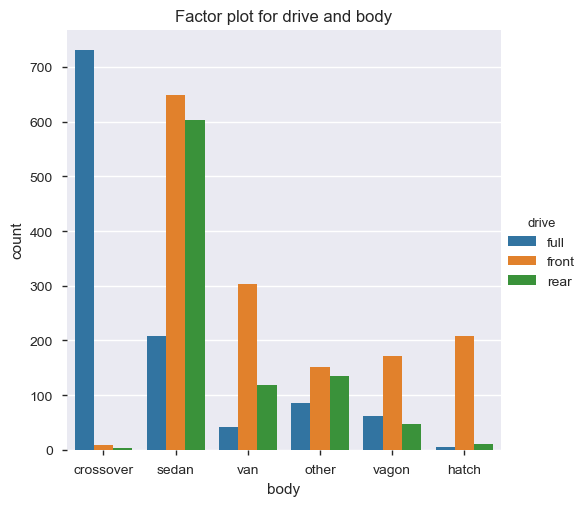

In [147]:
sns.factorplot('body', hue='drive', kind='count', data=cart5v2);
plt.title('Factor plot for drive and body')

- Crossovers are almost all Full-Drives which explains why their mean engine volume is higher
- More people opting for higher power

- Entire dataset

In [164]:
carbody = cars.groupby(['car','drive','body']).agg({'price':'sum'})
carbody_percent = carbody.groupby(level='car').apply(lambda x: 100 * x / (carbody['price'].sum()))
carbody_percent.sort_values(by=['price'],ascending=False).head(6)

,,,price
car,drive,body,
Mercedes-Benz,full,crossover,6.535241
Land Rover,full,crossover,4.993955
BMW,full,crossover,4.944046
Toyota,full,crossover,4.810835
BMW,rear,sedan,2.790855
Mercedes-Benz,rear,sedan,2.629203


- In whole Dataset LandRover Crossovers have revenue share of 5% and occupies 2nd place
- Mercedes Crossovers have revenue share of 6.5% and occupies top spot

In [152]:
carbody = cars.groupby(['car','body','drive','engType']).agg({'price':'sum'})
carbody_percent = carbody.groupby(level='car').apply(lambda x: 100 * x / (carbody['price'].sum()))
carbody_percent.sort_values(by=['price'],ascending=False).head(10)

price
car           body      drive engType          
Mercedes-Benz crossover full  Diesel   3.391098
BMW           crossover full  Diesel   2.851723
Land Rover    crossover full  Diesel   2.821556
Mercedes-Benz crossover full  Petrol   2.784144
Toyota        crossover full  Diesel   2.427297
Land Rover    crossover full  Petrol   1.930022
BMW           crossover full  Petrol   1.718808
              sedan     rear  Petrol   1.515135
Volkswagen    van       front Diesel   1.450758
Mercedes-Benz other     full  Petrol   1.420065

- Add engine type, Full drive Mercedes-Benz crossovers has highest revenue market share

In [169]:
carbody = cars.groupby(['car','body','drive','engType','model']).agg({'price':'sum'})
carbody_percent = carbody.groupby(level='car').apply(lambda x: 100 * x / (carbody['price'].sum()))
carbody_percent.sort_values(by=['price'],ascending=False).head(10)

,,,,,price
car,body,drive,engType,model,
BMW,crossover,full,Diesel,X5,1.850121
Toyota,crossover,full,Diesel,Land Cruiser 200,1.706560
Land Rover,crossover,full,Diesel,Range Rover,1.486733
Mercedes-Benz,crossover,full,Diesel,GLS 350,1.298721
Volkswagen,crossover,full,Diesel,Touareg,1.242441
Land Rover,crossover,full,Petrol,Range Rover,1.079974
Audi,crossover,full,Diesel,Q7,1.069168
Land Rover,crossover,full,Diesel,Range Rover Sport,1.005300
Bentley,crossover,full,Petrol,Bentayga,0.960815


## 6 Conclusions


- Full wheel Crossovers have the top 3 revenue share (__From: Section 5.7__)
      - Mercedes-Benz 	full 	crossover 	6.53%
      - Land Rover 	    full 	crossover 	4.99%
      - BMW 	        full 	crossover 	4.94%
- Topmost selling are still Sedans
- There is a shift towards more power and diesel engines
- __Mercedes-Benz full crossovers__ lead the chart when analysis was run down on the basis of drivetype and body.(__From: Section 5.7__)
- __Diesel Mercedes-Benz full crossovers__ have share of 3.39%.
- From the analyis, it was concluded that __BMW X5 diesel has highest revenue share category__ 